In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn requests tf2onnx skl2onnx onnx onnxmltools keras_tuner

In [9]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
def load_raw_data():
    subjects = [f'mHealth_subject{i}.log' for i in range(1, 11)]
    data_list = []

    print("Loading subject log files...")
    for filename in subjects:
        filepath = os.path.join(RAW_DATA_DIR, filename)
        if os.path.exists(filepath):
            # 23 columns
            df = pd.read_csv(filepath, sep='\t', header=None)
            data_list.append(df)

    if not data_list:
        raise FileNotFoundError("No data found. Run 01-data-collection.ipynb first.")

    return pd.concat(data_list, ignore_index=True)

In [11]:
RAW_DATA_DIR = 'data/raw/MHEALTHDATASET'
PROCESSED_DATA_DIR = 'data/processed'
df = load_raw_data()

Loading subject log files...


In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-9.8184,0.009971,0.29563,0.004186,0.004186,2.1849,-9.6967,0.63077,0.103900,-0.84053,...,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,-2.35000,-1.610200,-0.030899,0
1,-9.8489,0.524040,0.37348,0.004186,0.016745,2.3876,-9.5080,0.68389,0.085343,-0.83865,...,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,-2.16320,-0.882540,0.326570,0
2,-9.6602,0.181850,0.43742,0.016745,0.037677,2.4086,-9.5674,0.68113,0.085343,-0.83865,...,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,-1.61750,-0.165620,-0.030693,0
3,-9.6507,0.214220,0.24033,0.079540,0.117220,2.1814,-9.4301,0.55031,0.085343,-0.83865,...,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,-1.07710,0.006945,-0.382620,0
4,-9.7030,0.303890,0.31156,0.221870,0.205130,2.4173,-9.3889,0.71098,0.085343,-0.83865,...,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,-0.53684,0.175900,-1.095500,0


In [13]:
print(df.describe())

                 0             1             2             3             4   \
count  1.215745e+06  1.215745e+06  1.215745e+06  1.215745e+06  1.215745e+06   
mean  -8.522361e+00 -2.140013e-01 -1.055950e+00 -5.122403e-03 -4.506434e-03   
std    4.075293e+00  2.138954e+00  3.574163e+00  7.465971e-01  7.270395e-01   
min   -2.243800e+01 -2.018800e+01 -1.840100e+01 -8.619600e+00 -8.619600e+00   
25%   -9.804000e+00 -1.272900e+00 -2.867300e+00 -2.344300e-01 -1.883800e-01   
50%   -9.311400e+00 -3.538100e-01 -8.702000e-01 -7.116700e-02 -4.186300e-02   
75%   -7.637100e+00  7.097800e-01  7.259100e-01  1.590800e-01  1.507100e-01   
max    1.909400e+01  2.092700e+01  2.619600e+01  8.514900e+00  8.519100e+00   

                 5             6             7             8             9   \
count  1.215745e+06  1.215745e+06  1.215745e+06  1.215745e+06  1.215745e+06   
mean   1.494200e+00 -9.692878e+00 -9.548056e-01 -1.598951e-03 -6.166318e-01   
std    3.826485e+00  4.171303e+00  5.461803e+00  4.

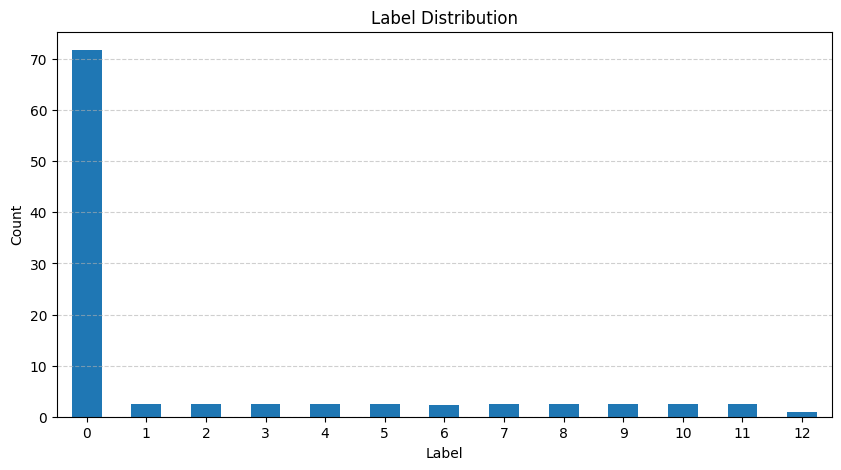

In [14]:

label_counts = (df.iloc[:, 23].value_counts(normalize=True)*100).sort_index()

# Plot bar chart
plt.figure(figsize=(10,5))
label_counts.plot(kind='bar')

plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

==== UNIVARIATE ANALYSIS ====


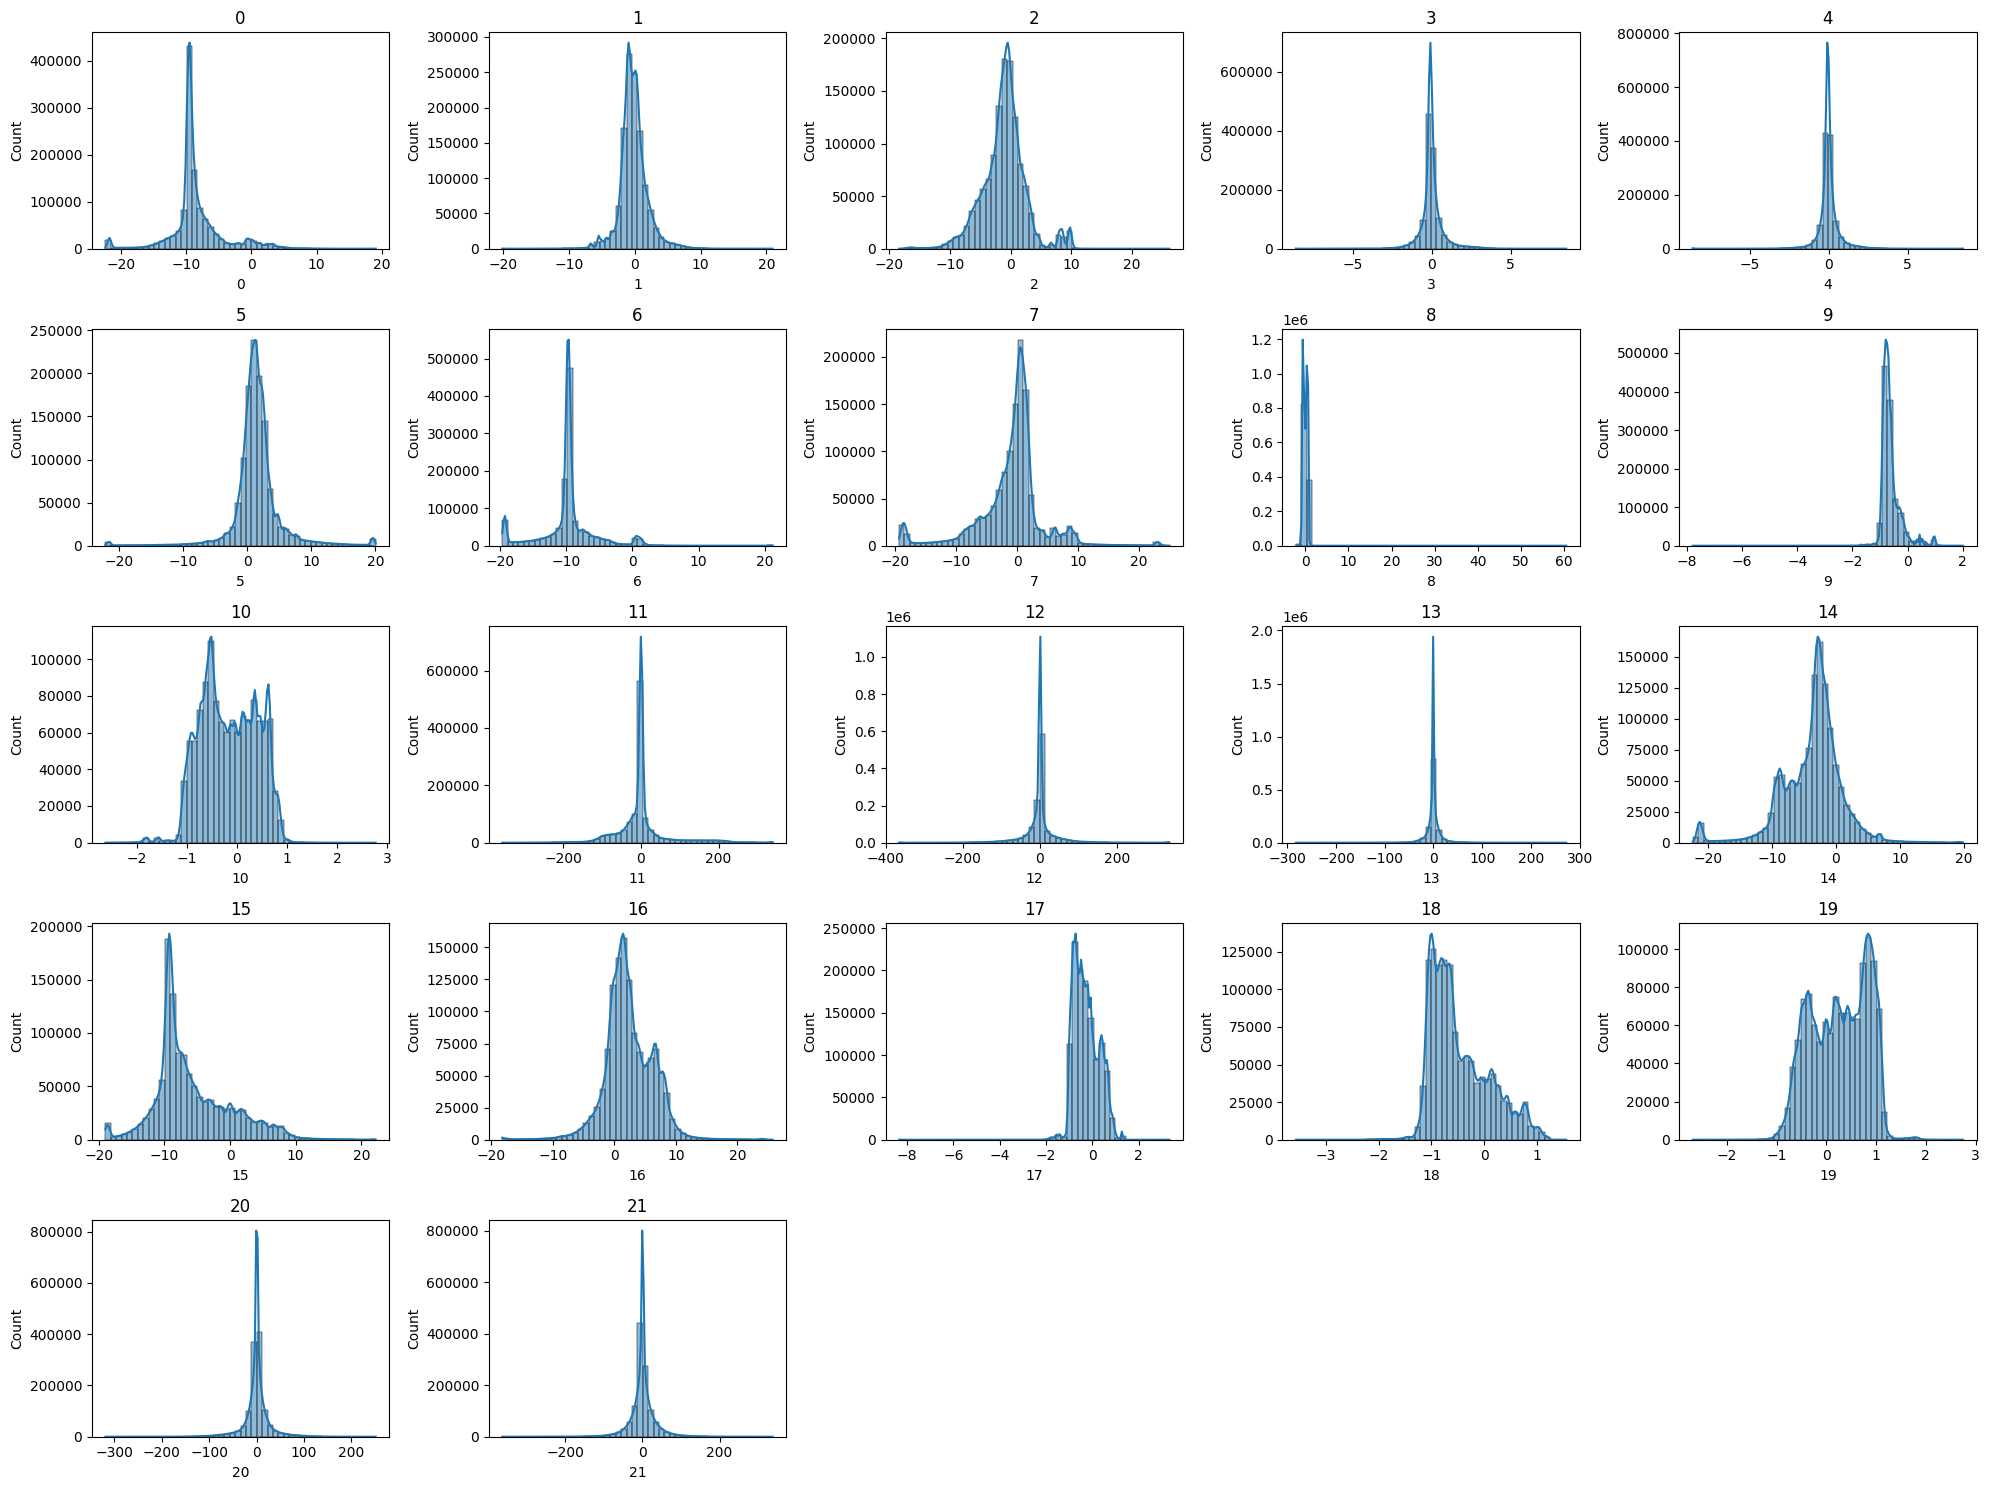

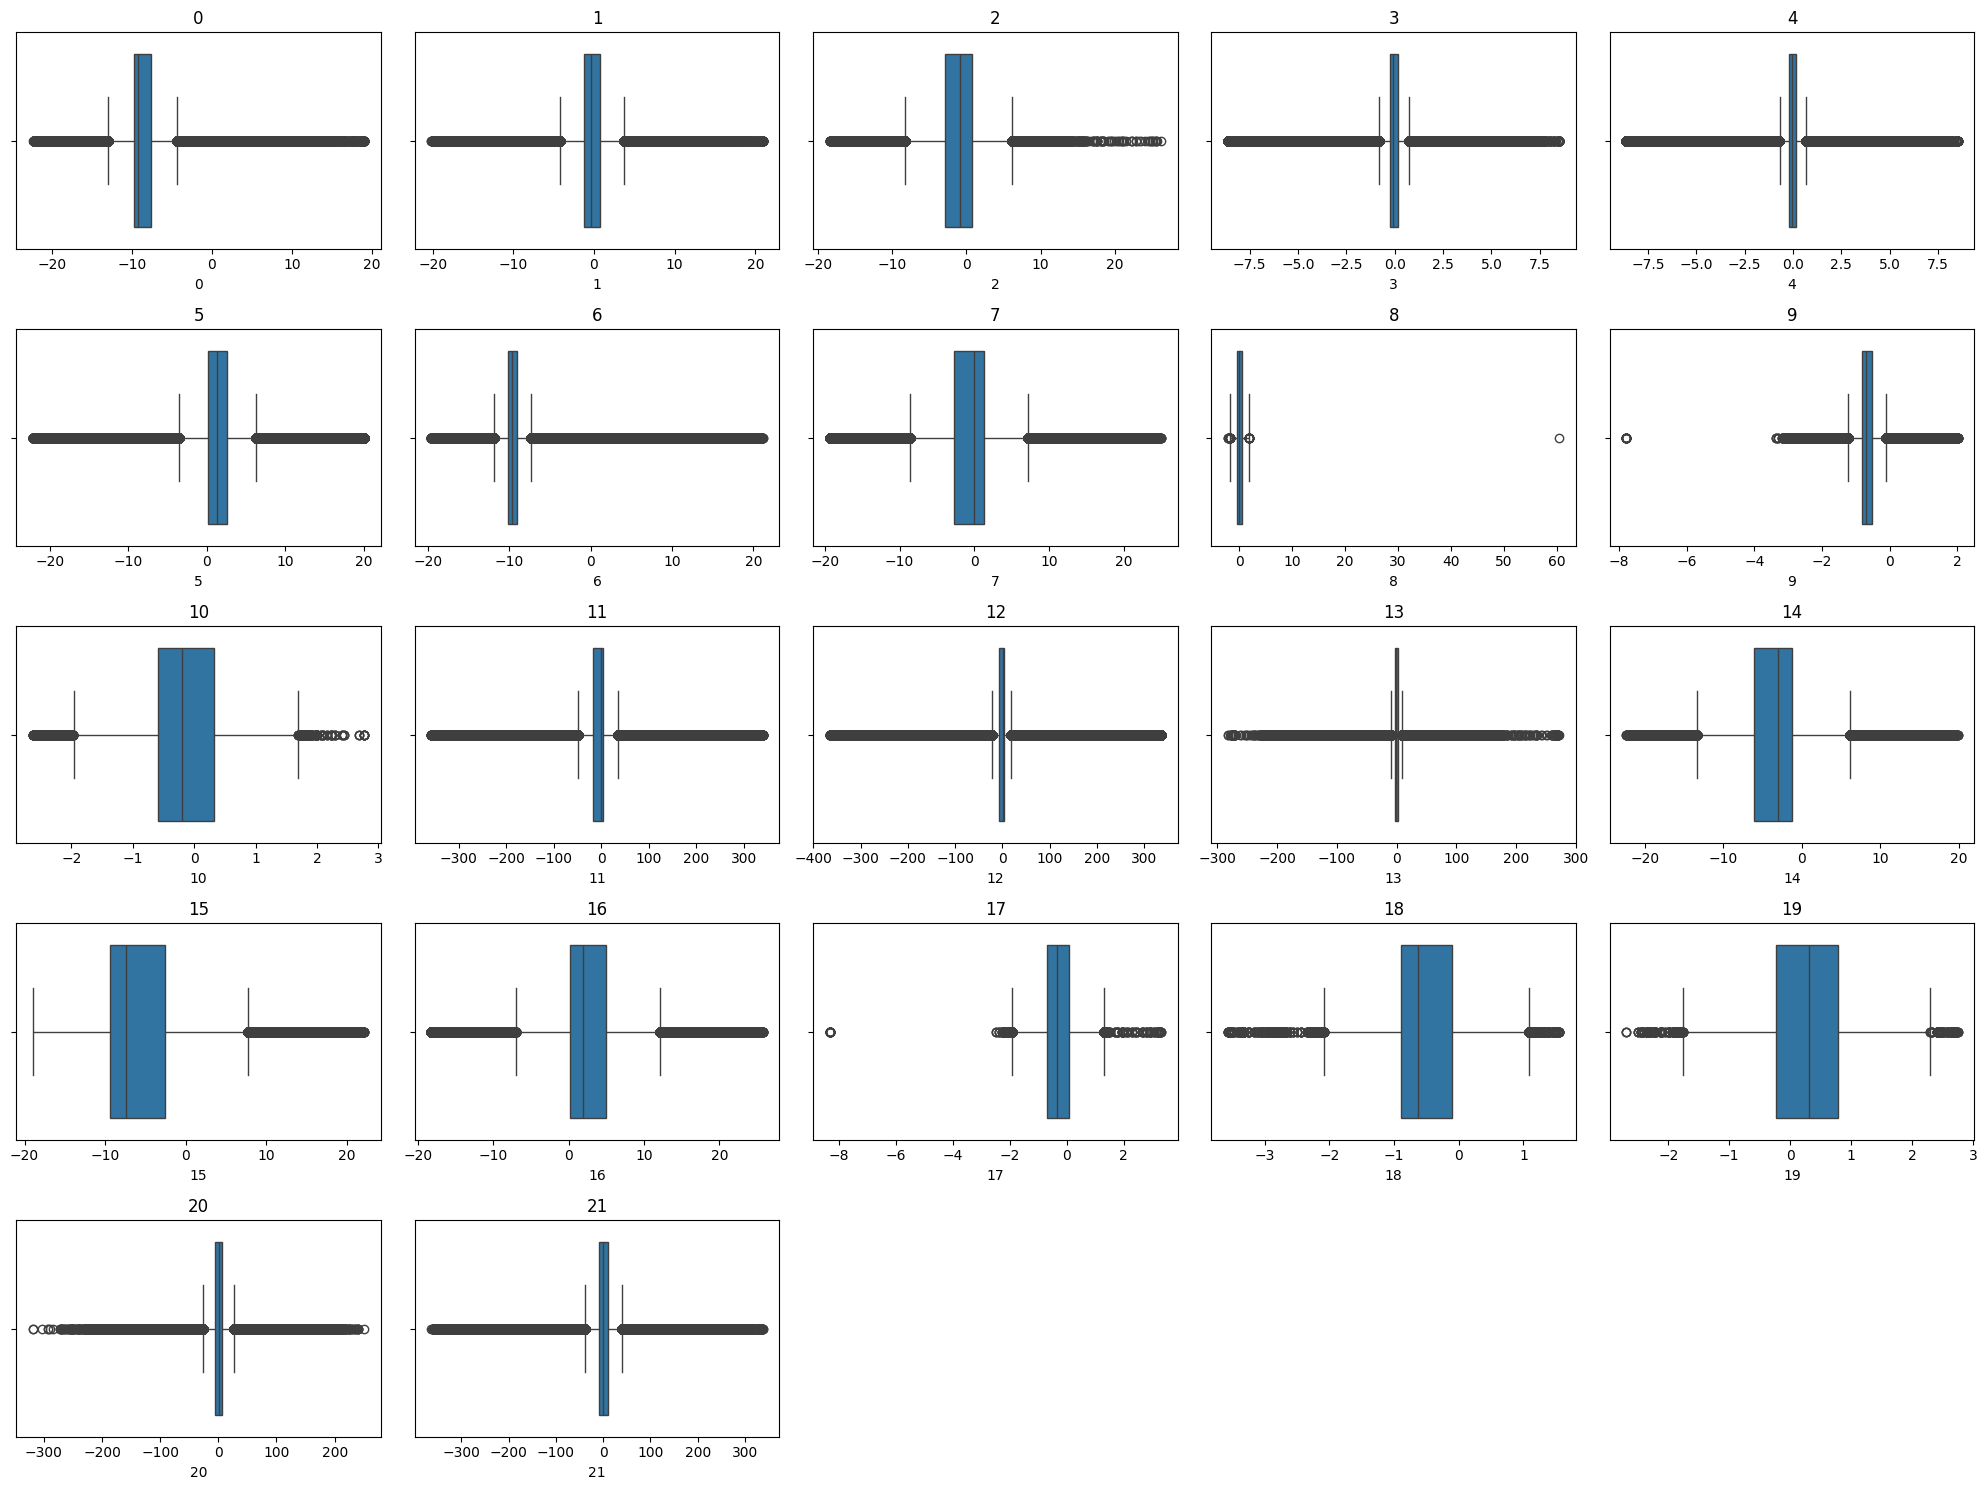

In [15]:
print("==== UNIVARIATE ANALYSIS ====")
sensor_cols = df.columns[:-2]

# Plot histograms
plt.figure(figsize=(20, 15))
for i, col in enumerate(sensor_cols):
    plt.subplot(5, 5, i+1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Plot boxplots
plt.figure(figsize=(20, 15))
for i, col in enumerate(sensor_cols):
    plt.subplot(5, 5, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

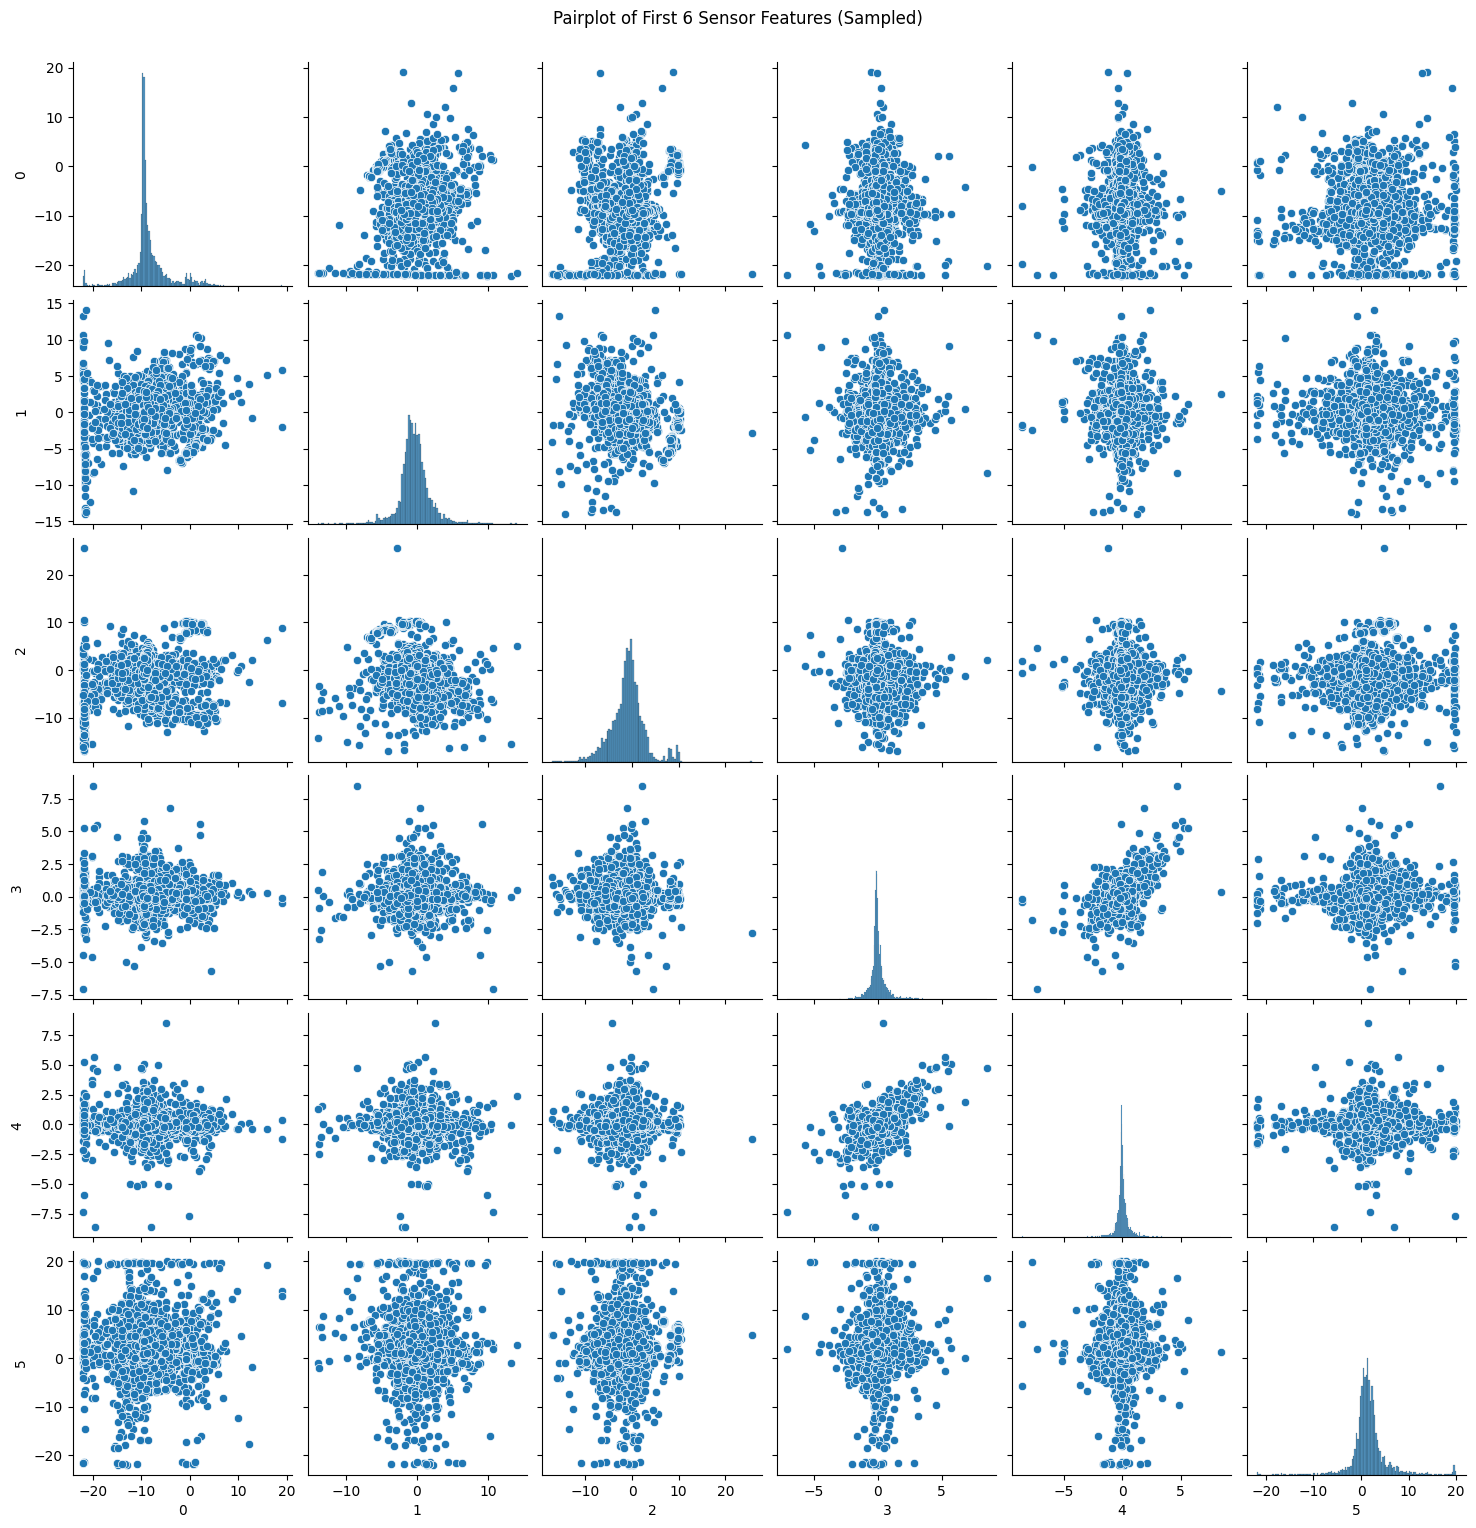

In [18]:
# Pairplot sample
sample_df = df.sample(5000, random_state=42)  # sample for speed
sns.pairplot(sample_df[sensor_cols[:6]])  # first 6 columns
plt.suptitle("Pairplot of First 6 Sensor Features (Sampled)", y=1.02)
plt.show()

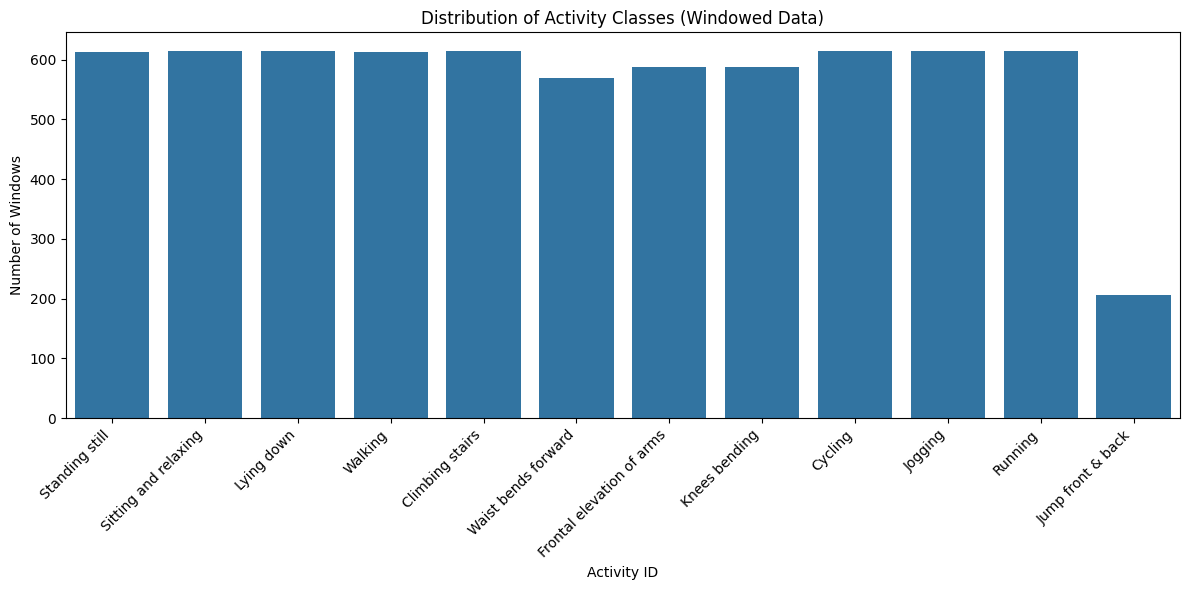

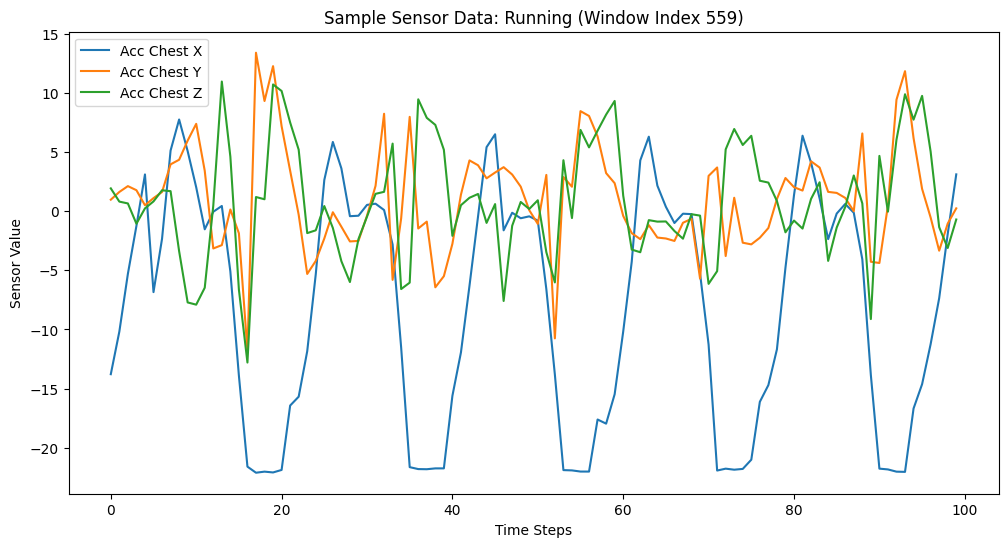

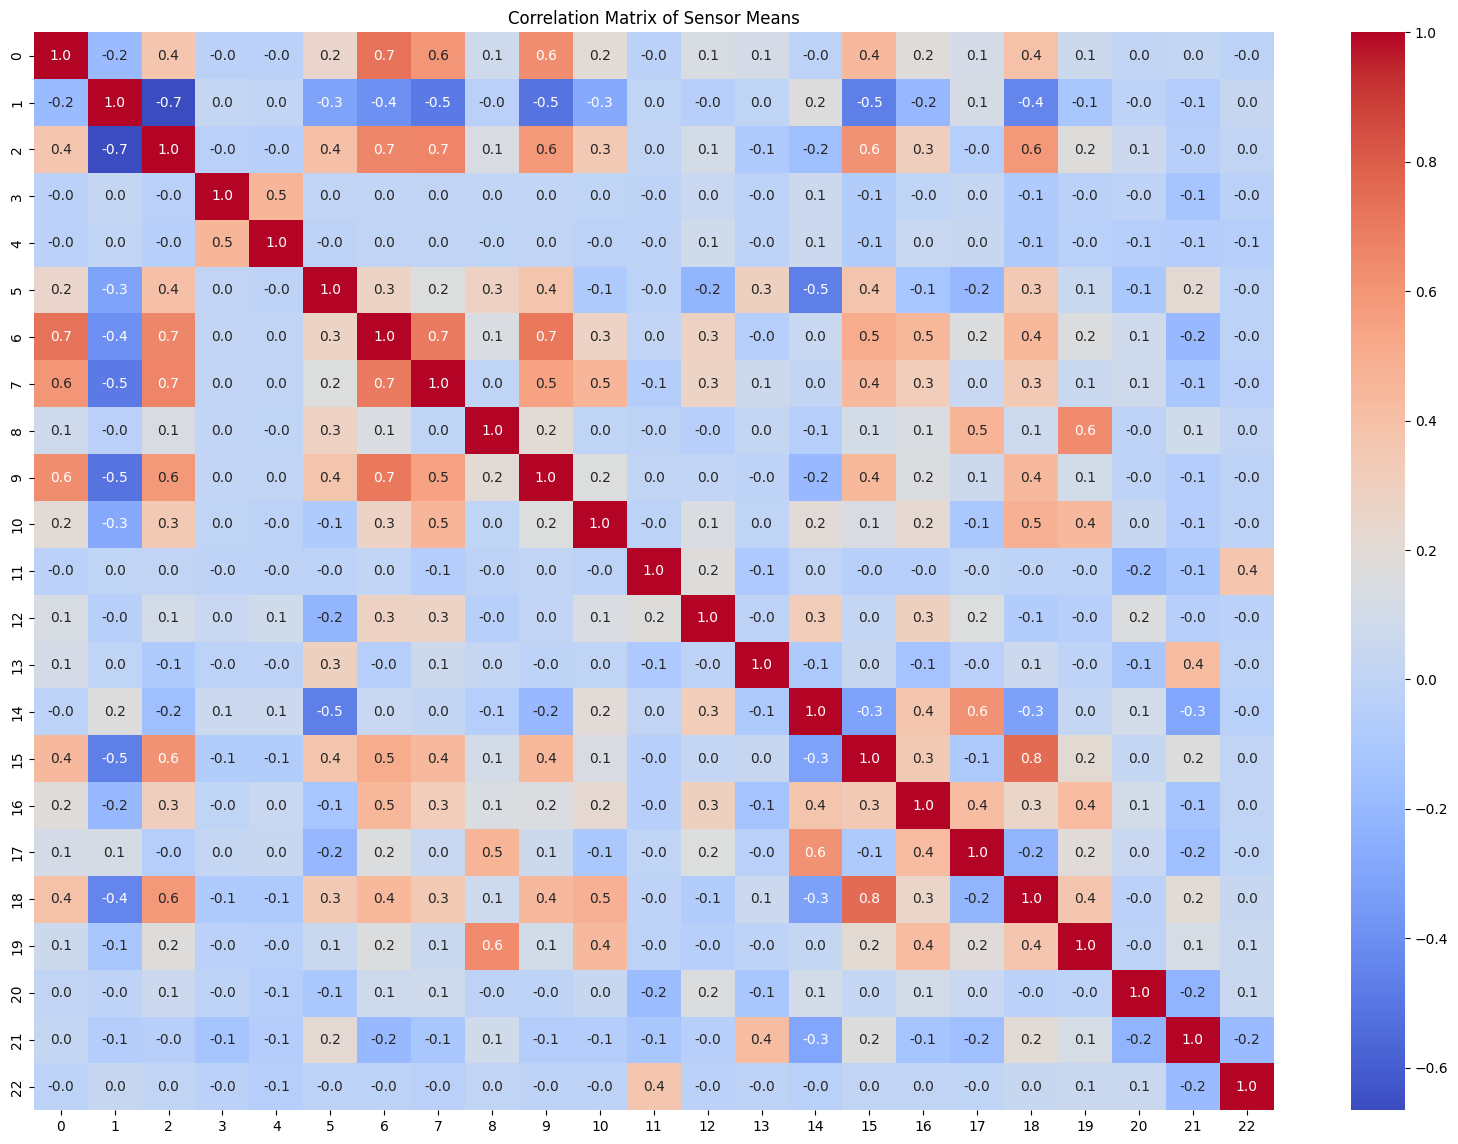

In [20]:
# Load Data
X = np.load('data/processed/X.npy')
y = np.load('data/processed/y.npy')

ACTIVITY_MAP = {
    0: 'Standing still', 1: 'Sitting and relaxing', 2: 'Lying down',
    3: 'Walking', 4: 'Climbing stairs', 5: 'Waist bends forward',
    6: 'Frontal elevation of arms', 7: 'Knees bending', 8: 'Cycling',
    9: 'Jogging', 10: 'Running', 11: 'Jump front & back'
}

# 1. Class Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x=y)
plt.title('Distribution of Activity Classes (Windowed Data)')
plt.xlabel('Activity ID')
plt.xticks(ticks=range(12), labels=[ACTIVITY_MAP[i] for i in range(12)], rotation=45, ha='right')
plt.ylabel('Number of Windows')
plt.tight_layout()
plt.show()

# 2. Sensor Signal Visualization (Sample)
# Plot the first window of "Running" (Class 10)
run_idx = np.where(y == 10)[0][0]
sample_window = X[run_idx]

plt.figure(figsize=(12, 6))
plt.plot(sample_window[:, 0], label='Acc Chest X') # Column 0
plt.plot(sample_window[:, 1], label='Acc Chest Y') # Column 1
plt.plot(sample_window[:, 2], label='Acc Chest Z') # Column 2
plt.title(f'Sample Sensor Data: Running (Window Index {run_idx})')
plt.xlabel('Time Steps')
plt.ylabel('Sensor Value')
plt.legend()
plt.show()

# 3. Feature Correlation (Flattened Mean)
# Calculate mean of each sensor across windows for correlation check
X_mean = np.mean(X, axis=1)
plt.figure(figsize=(20, 14))
sns.heatmap(np.corrcoef(X_mean.T), cmap='coolwarm', annot=True, fmt='0.1f')
plt.title('Correlation Matrix of Sensor Means')
plt.show()